# import library

In [ ]:
import pandas as pd
import re
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from surprise import Dataset, Reader, SVD
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle

import warnings
warnings.filterwarnings('ignore')

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meesa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meesa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\meesa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# Load data

In [10]:
rec = pd.read_csv('recommendation.csv')

# Data Pre- processing

In [11]:
rec.head()

,Place Name,City,Location,Rating,Review Count,Popularity Score,Review
0,Marina Beach,Chennai,"Chennai, Tamil Nadu, India",2.9,4359,79.80,Disappointing experience!
1,Kapaleeshwarar Temple,Chennai,"Chennai, Tamil Nadu, India",4.2,489,86.44,"மிகவும் அழகான சூழல், மறக்க முடியாத அனுபவம்."
2,Santhome Basilica,Chennai,"Chennai, Tamil Nadu, India",3.9,2723,91.61,"Beautiful ambiance, must-visit spot."
3,Fort St. George,Chennai,"Chennai, Tamil Nadu, India",3.2,4901,88.50,"நல்ல கட்டமைப்பு, குடும்பத்துடன் செல்ல நல்ல இடம்."
4,Vivekananda House,Chennai,"Chennai, Tamil Nadu, India",4.4,56,88.28,"Beautiful ambiance, must-visit spot."


In [12]:
rec.tail()

,Place Name,City,Location,Rating,Review Count,Popularity Score,Review
995,Botanical Garden - 45 - 43 - 34,Hyderabad,"Hyderabad, Telangana, India",4.4,145,88.72,"సామాన్య అనుభవం, ఎక్కువ అంచనాలు పెట్టుకోకండి."
996,Birla Mandir - 43,Hyderabad,"Hyderabad, Telangana, India",5.0,3983,119.91,"Too crowded, didn't enjoy much."
997,Peddamma Temple - 19 - 10,Hyderabad,"Hyderabad, Telangana, India",4.5,2756,103.78,Amazing experience! Loved every moment.
998,Mecca Masjid - 44 - 34 - 22,Hyderabad,"Hyderabad, Telangana, India",4.1,4040,102.20,"శాంతమైన వాతావరణం, చాలా బాగుంది."
999,Shri Jagannath Temple - 43 - 25 - 30 - 26 - 47,Hyderabad,"Hyderabad, Telangana, India",2.8,4933,80.66,Amazing experience! Loved every moment.


In [13]:
rec.sample(10)

,Place Name,City,Location,Rating,Review Count,Popularity Score,Review
60,Birla Planetarium - 28,Chennai,"Chennai, Tamil Nadu, India",4.3,1200,92.00,இங்கு வந்தது ஒரு சிறந்த தேர்வு!
835,Osman Sagar Lake,Hyderabad,"Hyderabad, Telangana, India",4.4,2171,98.86,"ఇక్కడ రద్దీ ఎక్కువ, పూర్తిగా ఆనందించలేకపోయాను."
146,Madras War Cemetery - 23,Chennai,"Chennai, Tamil Nadu, India",3.4,189,68.94,சேவைகள் மேம்படுத்தப்பட வேண்டும்.
221,Art Galleries at Karnataka Chitrakala Parishath,Bangalore,"Bangalore, Karnataka, India",4.3,4612,109.06,"ಸುಂದರ ವಾತಾವರಣ, ಮರೆಯಲಾಗದ ಅನುಭವ."
20,Royapuram Fishing Harbour,Chennai,"Chennai, Tamil Nadu, India",3.8,1303,82.52,Services need improvement.
691,Nehru Planetarium - 12,Delhi,"Delhi, India",4.0,2278,91.39,"देखने में जितना अच्छा लगा, असलियत में वैसा नही..."
42,Chennai Rail Museum,Chennai,"Chennai, Tamil Nadu, India",4.0,1907,89.53,சுத்தம் பராமரிக்கப்படவில்லை.
652,Jantar Mantar - 27,Delhi,"Delhi, India",3.2,2199,75.00,"अच्छी तरह से रखरखाव किया गया, पर्यटकों के लिए ..."
742,Gurudwara Bangla Sahib - 29 - 37,Delhi,"Delhi, India",2.6,2218,63.09,"बहुत ही साफ़-सुथरा और शांत, सबको सलाह दूँगा।"
134,Birla Planetarium - 45,Chennai,"Chennai, Tamil Nadu, India",4.0,386,81.93,நம்பியதை விட மோசம்!


In [14]:
rec.describe()

,Rating,Review Count,Popularity Score
count,1000.000000,1000.000000,1000.000000
mean,3.775500,2496.621000,87.993190
std,0.707779,1471.107568,16.013293
min,2.500000,24.000000,50.670000
25%,3.200000,1167.750000,75.912500
50%,3.800000,2510.000000,88.360000
75%,4.400000,3763.500000,100.360000
max,5.000000,4993.000000,123.800000


In [15]:
rec['City'].value_counts()

City
Chennai      200
Bangalore    200
Kochi        200
Delhi        200
Hyderabad    200
Name: count, dtype: int64

In [16]:
rec.City.nunique()

5

In [17]:
rec['Rating'].value_counts()

Rating
3.3    52
2.8    51
4.4    50
4.3    50
3.5    47
3.7    47
4.2    46
3.8    44
4.7    43
4.0    42
4.1    41
3.4    40
2.9    40
4.6    40
3.1    37
3.2    36
4.5    36
2.6    35
4.8    33
3.9    33
4.9    32
3.0    29
3.6    27
5.0    26
2.7    23
2.5    20
Name: count, dtype: int64

# Text - pre processing

In [18]:
# Remove numbers from Place Name
rec["Place Name"] = rec["Place Name"].apply(lambda x: re.sub(r'\d+', '', x).strip())

In [19]:
# Function to translate non-English reviews to English
def translate_review(review):
    try:
        lang_detect = GoogleTranslator(source='auto', target='en')
        return lang_detect.translate(review)
    except:
        return review  # Return as is if translation fails

# Apply translation
rec["Review"] = rec["Review"].apply(translate_review)

In [20]:
rec.sample(20)

,Place Name,City,Location,Rating,Review Count,Popularity Score,Review
756,Bhardwaj Lake - - -,Delhi,"Delhi, India",4.0,2371,91.86,"Very clean and calm, I will advise everyone."
140,Madras High Court -,Chennai,"Chennai, Tamil Nadu, India",3.9,4418,100.09,"Not well, maintenance is needed."
178,Cholamandal Artists' Village - -,Chennai,"Chennai, Tamil Nadu, India",3.6,1156,77.78,Fantastic place! Was very happy.
46,Nanmangalam Reserve Forest,Chennai,"Chennai, Tamil Nadu, India",4.0,548,82.74,"Cleaning and peace, strictly recommended."
167,Thousand Lights Mosque - - - -,Chennai,"Chennai, Tamil Nadu, India",4.0,2764,93.82,Cleaning is not maintained.
640,Sulabh International Museum of Toilets,Delhi,"Delhi, India",2.8,3128,71.64,Disappointing experience!
130,Nanmangalam Reserve Forest -,Chennai,"Chennai, Tamil Nadu, India",5.0,3314,116.57,Disappointing experience!
923,Forum Sujana Mall -,Hyderabad,"Hyderabad, Telangana, India",4.5,4713,113.56,Cleanliness could be better.
899,Mrugavani National Park - -,Hyderabad,"Hyderabad, Telangana, India",4.5,2360,101.80,"The most beautiful place, a place to visit."
533,Vallarpadam Church -,Kochi,"Kochi, Kerala, India",3.0,661,63.30,To try to clean up to clean.


In [40]:
rec.to_csv('cleaned_dataset')

# Data visualization

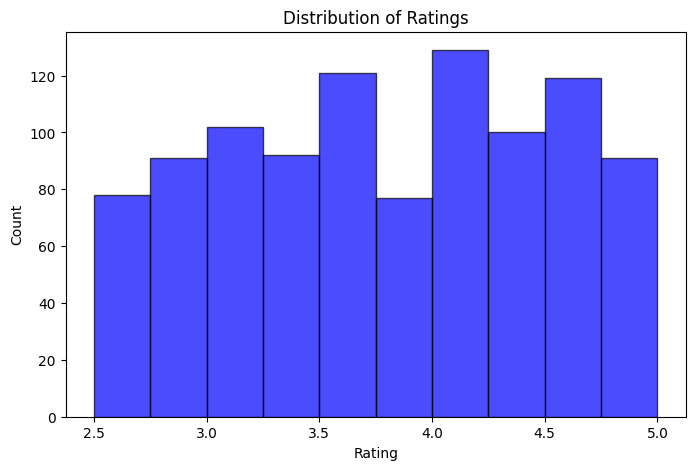

In [25]:
# Plot Rating Distribution
plt.figure(figsize=(8,5))
plt.hist(rec['Rating'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

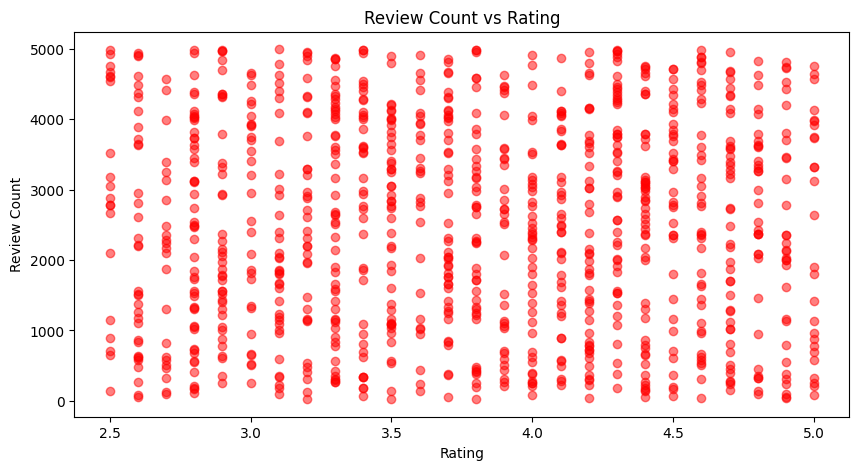

In [26]:
# Plot Review Count vs Rating
plt.figure(figsize=(10,5))
plt.scatter(rec['Rating'], rec['Review Count'], alpha=0.5, color='red')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Review Count vs Rating')
plt.show()


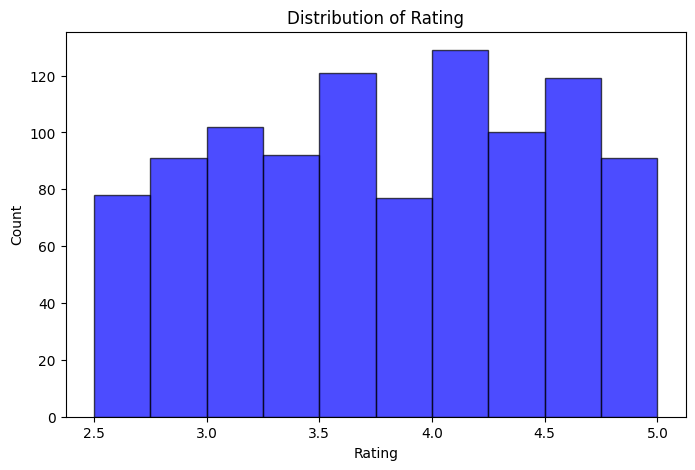

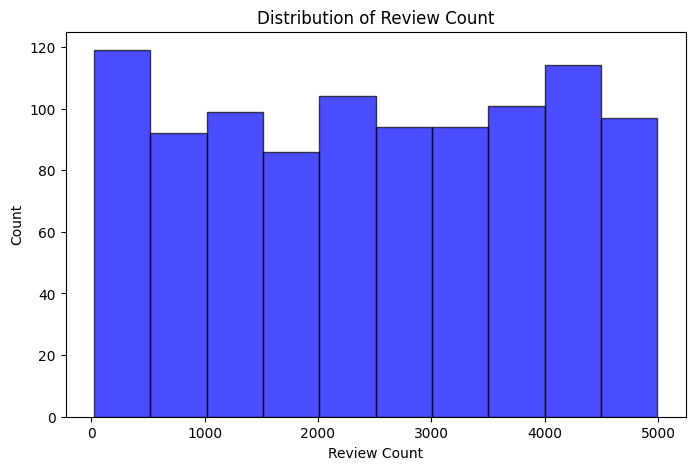

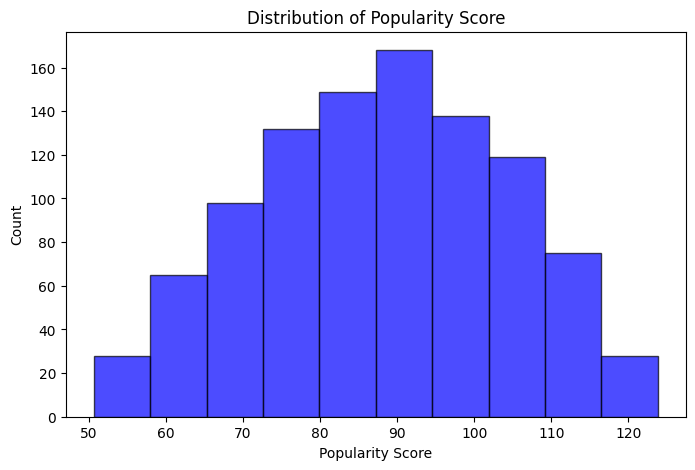

In [27]:
# Plot each column
columns_to_plot = ["Rating", "Review Count", "Popularity Score"]
for col in columns_to_plot:
    plt.figure(figsize=(8,5))
    plt.hist(rec[col], bins=10, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

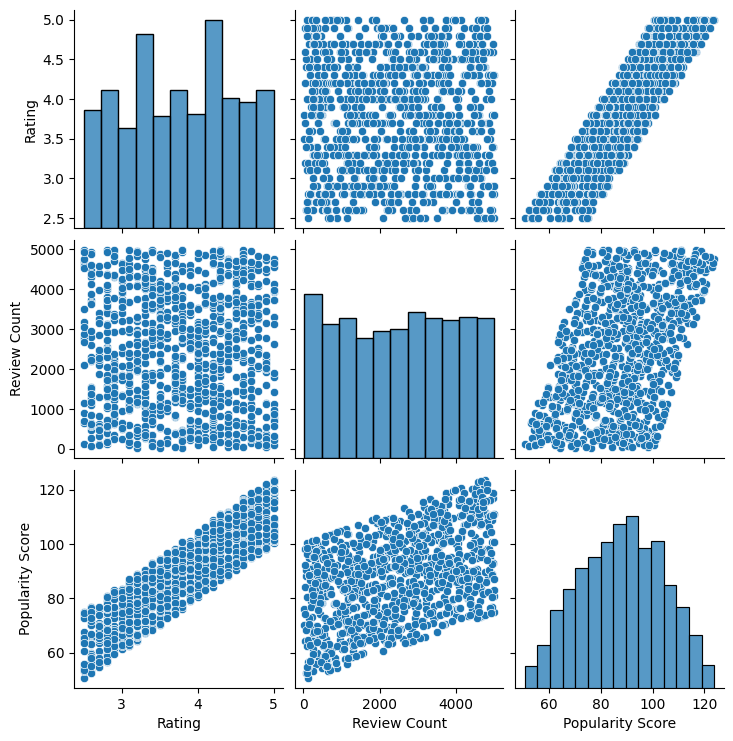

In [28]:
# Pairplot for numerical columns
sns.pairplot(rec[columns_to_plot])
plt.show()

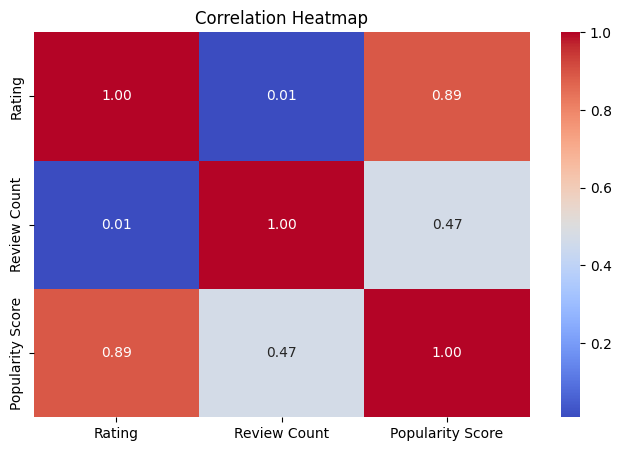

In [29]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(rec[columns_to_plot].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

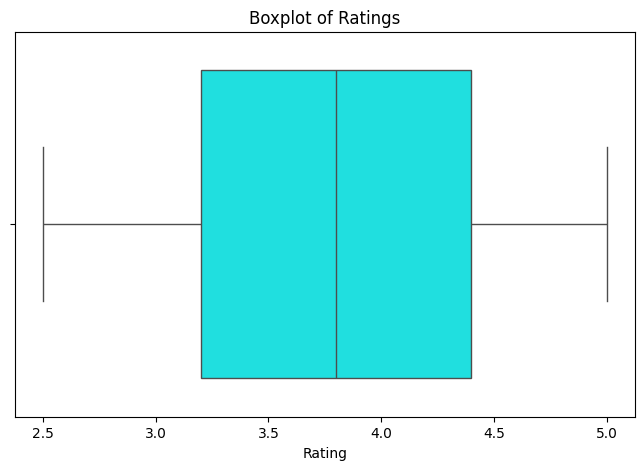

In [30]:
# Boxplot for Ratings
plt.figure(figsize=(8,5))
sns.boxplot(x=rec["Rating"], color='cyan')
plt.title("Boxplot of Ratings")
plt.show()

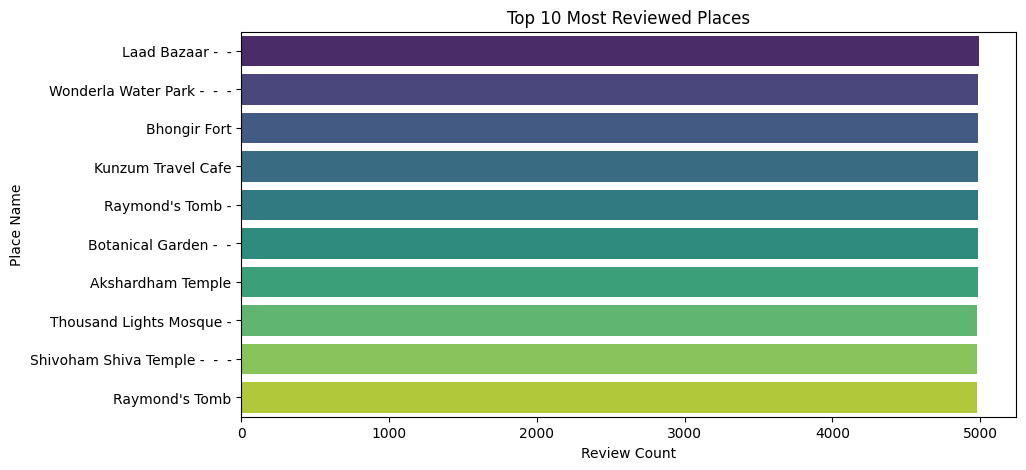

In [31]:
# Bar plot for top 10 most reviewed places
top_reviewed = rec.sort_values(by='Review Count', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_reviewed['Place Name'], x=top_reviewed['Review Count'], palette='viridis')
plt.xlabel("Review Count")
plt.ylabel("Place Name")
plt.title("Top 10 Most Reviewed Places")
plt.show()

# Model Implementation

In [34]:
nltk.download('punkt_tab')
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

rec["Processed Review"] = rec["Review"].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\meesa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [35]:
# Tokenization and Feature Extraction
tokenizer = Tokenizer()
tokenizer.fit_on_texts(rec["Processed Review"])
X = tokenizer.texts_to_sequences(rec["Processed Review"])
X = pad_sequences(X, maxlen=10)
y = np.arange(len(rec))  # Simple label encoding for training

In [36]:
# Word2Vec Model
sentences = [word_tokenize(text) for text in rec["Processed Review"]]
w2v_model = Word2Vec(sentences, vector_size=50, min_count=1, window=3)

In [37]:
# CNN Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=10),
    Conv1D(128, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(len(rec), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.0000e+00 - loss: 6.9103 - val_accuracy: 0.0000e+00 - val_loss: 6.9224
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0158 - loss: 6.8999 - val_accuracy: 0.0000e+00 - val_loss: 6.9657
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0024 - loss: 6.8636 - val_accuracy: 0.0000e+00 - val_loss: 7.2529
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0059 - loss: 6.6789 - val_accuracy: 0.0000e+00 - val_loss: 8.5890
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0066 - loss: 6.2149 - val_accuracy: 0.0000e+00 - val_loss: 11.5014
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0183 - loss: 5.5555 - val_accuracy: 0.0000e+00 - val_loss: 14.8628
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0286 - loss: 4.8820 - val_accuracy: 0.0000e+00 - val_loss: 18.2111
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0239 - loss

# collaborative filtering

In [38]:
# ** Train SVD Model for Rating Prediction**
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(rec[['Place Name', 'City', 'Rating']], reader)

# 
trainset = dataset.build_full_trainset()

model = SVD()
model.fit(trainset)

with open("place_recommendation_model.pkl", "wb") as f:
    pickle.dump(model, f)

print(" Model Trained & Saved as 'place_recommendation_model.pkl'")

 Model Trained & Saved as 'place_recommendation_model.pkl'


# Prediction

In [45]:
def recommend_top_places(city, review_keyword, top_n=5):
    city_df = rec[rec["City"].str.lower() == city.lower()].copy()
    
    if city_df.empty:
        return f"No places found in {city}."

    # Load Model
    with open("place_recommendation_model.pkl", "rb") as f:
        model = pickle.load(f)

    # **TF-IDF Based Review Matching**
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(city_df['Review'])
    keyword_vector = vectorizer.transform([review_keyword])

    # Compute similarity scores
    scores = tfidf_matrix.dot(keyword_vector.T).toarray().flatten()
    city_df["Review Score"] = scores

    # **Sort by Review Score, Rating**
    city_df = city_df.sort_values(by=["Review Score", "Rating"], ascending=[False, False])

    # **Get Top N Places**
    top_places = city_df.head(top_n)[["Place Name", "Rating", "Review Score"]]
    
    return top_places

# **Example User Input**
city_input = input("Enter City: ")
review_input = input("Enter Review Keyword: ")

recommend_top_places(city_input, review_input)

Enter City:  banglore
Enter Review Keyword:  Disappointing experience


'No places found in banglore.'